In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn 
from IPython.display import display
!pip install mglearn
%matplotlib inline
import sklearn
from sklearn.datasets import make_blobs
from sklearn.datasets.samples_generator import make_blobs

 X.shape: (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


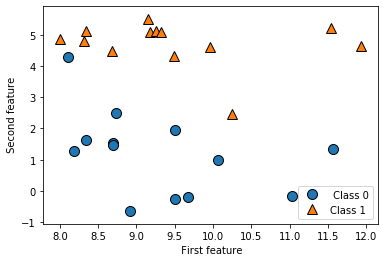

In [2]:
# forge dataset, which two features
# plots, each data point is represented as one dot. The color and shape of the dot indicates its class

# generate dataset 
X, y = mglearn.datasets.make_forge()
# plot dataset 
mglearn.discrete_scatter( X[:, 0], X[:, 1], y) 
plt.legend([" Class 0", "Class 1"], loc = 4) 
plt.xlabel(" First feature") 
plt.ylabel(" Second feature") 
print(" X.shape:", X.shape)



# We've got a dataset consists of 26 data points, with 2 features.


Text(0, 0.5, ' Target')

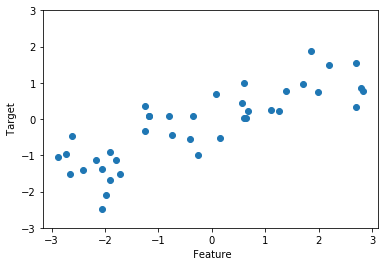

In [3]:
# To illustrate regression algorithms, we will use the synthetic wave dataset. The wave dataset has a single input feature and a continuous target variable (or response) that we want to model.

X, y = mglearn.datasets.make_wave( n_samples = 40) 
plt.plot( X, y, 'o') 
plt.ylim(-3, 3) 
plt.xlabel(" Feature") 
plt.ylabel(" Target")



 Above is plot of the wave dataset, with the x-axis showing the feature and the y-axis showing the regression target

In [4]:

#  We are using these very simple, low-dimensional datasets because we can easily visualize them

# Data with more than two features is hard to show. Any intuition derived from datasets with few features (also called low-dimensional datasets) might not hold in datasets with many features (high-dimensional datasets)

# We will complement these small synthetic datasets with two real-world datasets that are included in scikit-learn. 
# One is the Wisconsin Breast Cancer dataset

# The task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 
print(" cancer.keys():\ n", cancer.keys())

 cancer.keys():\ n dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(" Shape of cancer data:", cancer.data.shape)

 

 Shape of cancer data: (569, 30)


In [6]:
# Of these 569 data points, 212 are labeled as malignant and 357 as benign

print(" Sample counts per class:\ n", {n: v for n, v in zip( cancer.target_names, np.bincount( cancer.target))})

 

 Sample counts per class:\ n {'malignant': 212, 'benign': 357}


In [7]:
# To get a description of the semantic meaning of each feature, we can have a look at the feature_names attribute:
print("Feature names:\n", cancer.feature_names)


Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# We will also be using a real-world regression dataset, the Boston Housing dataset.

from sklearn.datasets import load_boston 
boston = load_boston() 
print("Data shape:", boston.data.shape)



Data shape: (506, 13)


In [9]:
! pip install mglearn

In [10]:
# For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called interactions) between features.

# This derived dataset can be loaded using the load_extended_boston function

import mglearn
X, y = mglearn.datasets.load_extended_boston() 
print(" X.shape:", X.shape)




 X.shape: (506, 104)


The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13 (with replacement).


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


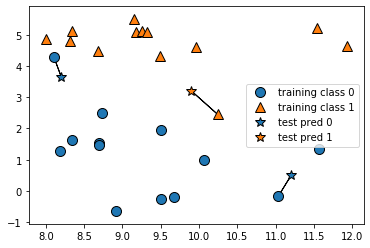

In [11]:
# We will use these datasets to explain and illustrate the properties of the different machine learning algorithms
# First, we will revisit the k-nearest neighbors (k-NN) algorithm that we saw in the previous chapter.
# The k-NN algorithm is arguably the simplest machine learning algorithm.
# Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset — its “nearest neighbors.”

from sklearn.datasets import make_blobs

mglearn.plots.plot_knn_classification( n_neighbors = 1)



This figure represent predictions made by the one-nearest-neighbor model on the forge dataset


Here, we added three new data points, shown as stars. For each of them, we marked the closest point in the training set.

 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


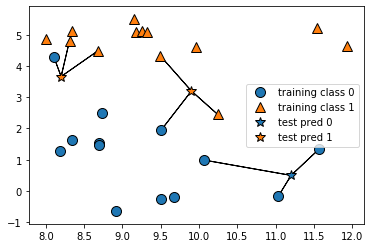

In [12]:
# The following example uses the three closest neighbors

mglearn.plots.plot_knn_classification( n_neighbors = 3)




This figure represent 3 NN

In [13]:
# Now let’s look at how we can apply the k-nearest neighbors algorithm using scikit-learn.
# First, we split our data into a training and a test set

from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge() 
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 0)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
# Next, we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. Here, we set it to 3:

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier( n_neighbors = 3)



In [15]:
# Now, we fit the classifier using the training set

clf.fit( X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
# To make predictions on the test data, we call the predict method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

print(" Test set predictions:", clf.predict( X_test))

 

 Test set predictions: [1 0 1 0 1 0 0]


In [17]:
# To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels:

print("Test set accuracy: {:.2f}". format(clf.score( X_test, y_test)))


Test set accuracy: 0.86


We see that our model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset.


No handles with labels found to put in legend.


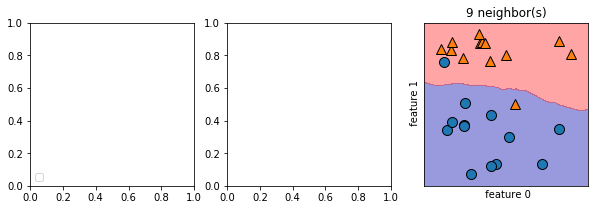

In [35]:
# Analyzing KNeighborsClassifier

# For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane.
# We color the plane according to the class that would be assigned to a point in this region. 
# This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1


fig, axes = plt.subplots( 1, 3, figsize =( 10, 3)) 

for n_neighbors, ax in zip([1, 3, 9], axes): 
    clf = KNeighborsClassifier(n_neighbors =n_neighbors). fit(X, y)
mglearn.plots.plot_2d_separator( clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
mglearn.discrete_scatter( X[:, 0], X[:, 1], y, ax = ax)
ax.set_title("{} neighbor(s)".format(n_neighbors))
ax.set_xlabel(" feature 0") 
ax.set_ylabel(" feature 1")
axes[0].legend(loc = 3)
